Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [38]:
import brfss
from matplotlib import pyplot as plt
import seaborn as sns
import math
import numpy as np
import random
from thinkstats2 import Jitter

In [3]:
df = brfss.ReadBrfss()

In [4]:
df = df.dropna(subset=['wtkg2', 'htm3'])

In [9]:
weight = df.wtkg2
log_weight = weight.apply(math.log10)
height = df.htm3

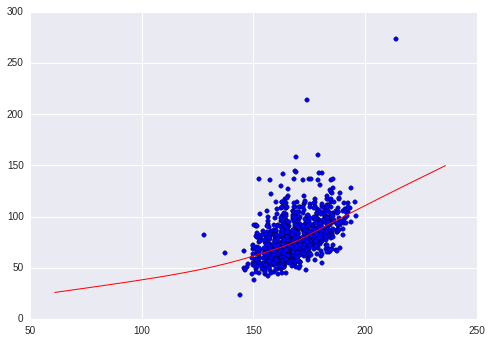

In [51]:
from statsmodels.nonparametric.smoothers_lowess import lowess
l = lowess(weight, height, return_sorted=True)
_ = plt.plot(l[:, 0],l[:, 1],'red',linewidth=1)

indicies = random.sample(xrange(len(weight)), 1000)
plt.scatter(Jitter(height[indicies], 1), Jitter(weight[indicies], 1), alpha = 1)

In [44]:
from thinkstats2 import LeastSquares
inter, slope = LeastSquares(height, log_weight)
print "Slope: %.3f, Intercept: %.2f" % (slope, inter)

Slope: 0.005, Intercept: 0.99


In [14]:
from math import exp
predictions = (slope * height + inter).apply(lambda x: 10**x)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from numpy import std

rms = sqrt(mean_squared_error(weight, predictions))
print "RME Using model: %.1f" % rms
print "RME Without model: %.1f" % std(weight)
print "Percentage improvement: %i%%" % (100 * (std(weight) - rms) / std(weight))
print "R^2 value: %.2f" % r2_score(weight, predictions)

RME Using model: 16.9
RME Without model: 19.5
Percentage improvement: 13%
R^2 value: 0.26


## Interpretation

Our model came up with the equation `weight = 9.84 * e^(.0122 * height)`. This means for ever 7.8 centimeters height increases, weight increases 10%. If we know how tall someone is, we can predict their weight with an additional accuracy of 13%

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.